In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml  # load_digits

In [2]:
#–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC  # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

In [3]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

In [4]:
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
pd.DataFrame(mnist.data).head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [6]:
X,y= mnist["data"],mnist["target"]
print(X.shape,y.shape)

(70000, 784) (70000,)


In [7]:
pd.DataFrame(mnist.target).head()

class
0     5
1     0
2     4
3     1
4     9

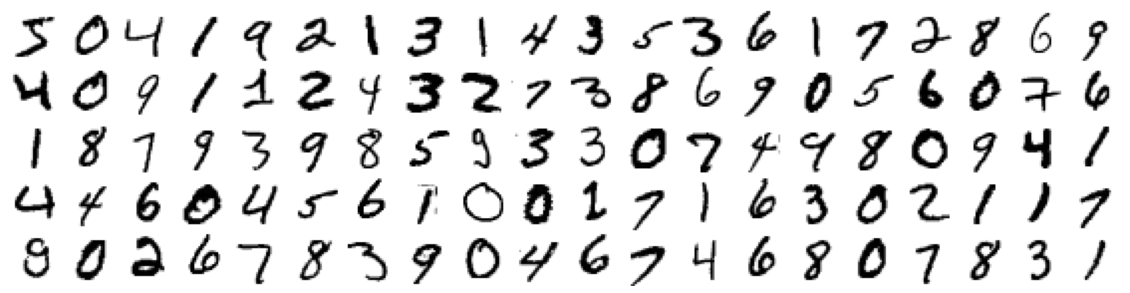

In [8]:
def showDigits(instances, images_per_row=20):
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(28,28) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((28, 28 * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(20,10))
example_images = X[:100].values  #—Ç–∞–∫–∏–º –¥–µ–π—Å—Ç–≤–∏–µ–º –æ—Ç–∫–∏–¥—ã–≤–∞–µ–º header
showDigits(example_images)
plt.show()

## Data scaling
–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–¥–æ–º MinMax
$X = \frac{X - X_{min}}{X_{max}-X_{min}}$

In [9]:
from sklearn import preprocessing
size = 20000
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
trainX, testX, trainY, testY = X_scaled[:size], X_scaled[60000:65000], y[:size].values, y[60000:65000].values
print(X_scaled.shape)

(70000, 784)


#Training

**Logistic Regression**

–õ–æ–≥–∏—á—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —è–≤–ª—è–µ—Ç—Å—è —á–∞—Å—Ç–Ω—ã–º —Å–ª—É—á–∞–µ–º –ª–∏–Ω–µ–π–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞.

–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –¥–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≤ –≤–∏–¥–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–µ–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ —ç–ª–µ–º–µ–Ω—Ç–∞
–∫ —Ç–æ–º—É –∏–ª–∏ –∏–Ω–æ–º—É –∫–ª–∞—Å—Å—É. 

–í–∏–¥ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏: $y = \beta_0 + \beta_1x_1 + ... \beta_nx_{n-1}$

–≥–¥–µ $y$ - –∑–∞–≤–∏—Å–∏–º–∞—è –ø–µ—Ä–º–µ–Ω–Ω–∞—è, $x_0, ..., x_{n-1}$ - –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è —Å–∏–≥–º–æ–∏–¥–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è:

$ùõî=\frac{1}{1 + e^{\beta_0 + \beta_1x_1 + ... \beta_nx_{n-1}}}$

–í –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ª–µ–∂–∏—Ç –º–µ—Ç–æ–¥ –º–∞–∫—Å–∏–º–∏–∑–∞—Ü–∏–∏ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è (MLE) - –∫–æ—Ç–æ—Ä—ã–π –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö –∂–µ–ª–∞–µ–º—ã—Ö –∏—Å—Ö–æ–¥ –ø—Ä–æ–∏–∑–æ–π–¥–µ—Ç —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é.

log-likelihood, log-loss, –õ–æ–≥–∞—Ä–∏—Ñ–º –ø—Ä–∞–¥–æ–ø–æ–¥–æ–±–∏—è $L(w) = -Œ£ln(P(y_i|x_i, w)) -> max$ –≠—Ç–æ –º—ã –º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É–µ–º.

–ê –∑–∞–¥–∞—á–∞ —Å—Ç–∞–≤–∏—Ç—Å—è –∫–∞–∫ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ —Ä–∏—Å–∫–∞:
$Q(w) = -Œ£ln(P(y_i|x_i, w)) = Œ£ln(1 + exp(-y_i|xi, w)$




In [10]:
lrg_model = LogisticRegression(max_iter=1000, random_state=42)  # multi_class='ovr'
lrg_model.fit(trainX, trainY)
prediction_lrg = lrg_model.predict(testX)
lrg_accuracy = accuracy_score(testY, prediction_lrg)
print(f' accuracy = {lrg_accuracy}')

KeyboardInterrupt: ignored

**Decision Tree**

\–î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π

1. –í—ã–±–∏—Ä–∞–µ–º —ç–ª–µ–º–µ–Ω—Ç –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è. –ú–æ–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å  —Å –ø–æ–º–æ—â—å—é –∏–Ω–¥–µ–∫—Å–∞ –î–∂–∏–Ω–∏ $Q = 1 - \sum_0^n p_i^2\$ - —Å—á–∏—Ç–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º –≤ —Å—Ä–µ–∑–µ. –ò–ª–∏ —Å –ø–æ–º–æ—â–±—é —ç–Ω—Ç—Ä–æ–ø–∏–∏: $H = -‚àë_0^n\frac{N_i}{N}log\frac{N_i}{N}$ - —Ç–∞–∫ –∂–µ —Å—É–º–º–∏—Ä—É–µ–º –ø–æ –≤—Å–µ–º –∫–ª–∞—Å—Å–∞–º –≤ —Å—Ä–µ–∑–µ, –µ—Å–ª–∏ –≤—Å–µ —ç–ª–µ–º–µ–Ω—Ç—ã –æ–¥–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ - –ª–æ–≥–∞—Ä–∏—Ñ–º –¥–∞–µ—Ç 0

2. –ù—É–∂–Ω–æ –∑–∞–¥–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –æ—Å—Ç–∞–Ω–æ–≤–∫–∏: —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –¥–æ—Å—Ç–∏–≥–Ω—É—Ç–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å, –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤–∞ –∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª-–≤–æ –ª–∏—Å—Ç—å–µ–≤.

3. –ü—Ä–∏—Ä–æ—Å—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∏–ª–∏ Information Gane (IG), –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫ —É–º–µ–Ω—å—à–µ–Ω–∏–∏ —ç–Ω—Ç—Ä–æ–ø–∏–∏. –¢–æ–≥–¥–∞ $IG = S_0 - \sum\frac{N_i}{N}S_i $, –≥–¥–µ $i$ - –Ω–æ–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏ –∏–∑ —Ä–∞–∑–±–∏–µ–Ω–∏—è. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è —Ç–∞–∫–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ, –≤ –∫–æ—Ç–æ—Ä–æ–º –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º—É–º –ø—Ä–∏—Ä–æ—Å—Ç–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth = 15, random_state=17)  # max_depth=3,
decision_tree.fit(trainX, trainY)
prediction_dtree = decision_tree.predict(testX)
des_tree_accuracy = accuracy_score(testY, prediction_dtree)
print(f' accuracy = {des_tree_accuracy}')

$H=-\sum\frac{N_i}{N}log(\frac{N_i}{N})$

$IG = S_0 - \sum N_i/N *S_i = S_0 - N_l/N * S_l - N_r/N * S_r $

1, 7 - –æ–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä–∞ –∏–∑ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫–ª–∞—Å—Å–æ–≤ –∏–∑ MNIST - –∑–Ω–∞—á–∏—Ç —ç—Ç–æ –¥–≤–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –æ—á–µ–Ω—å –ø–æ–∂–∏—Ö –ø–æ –Ω–∞–ø–∏—Å–∞–Ω–∏—é 1 –∏ 7

**Random Forest**

In [ ]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
forest.fit(trainX, trainY)
forest_accuracy = accuracy_score(testY, forest.predict(testX))
print(f' accuracy = {forest_accuracy}')

**Support Vector Machine**

In [ ]:
svm = LinearSVC(random_state = 17, max_iter = 10000)
svm.fit(trainX, trainY)
svm_accuracy = accuracy_score(testY, svm.predict(testX))
print(f' accuracy = {svm_accuracy}')

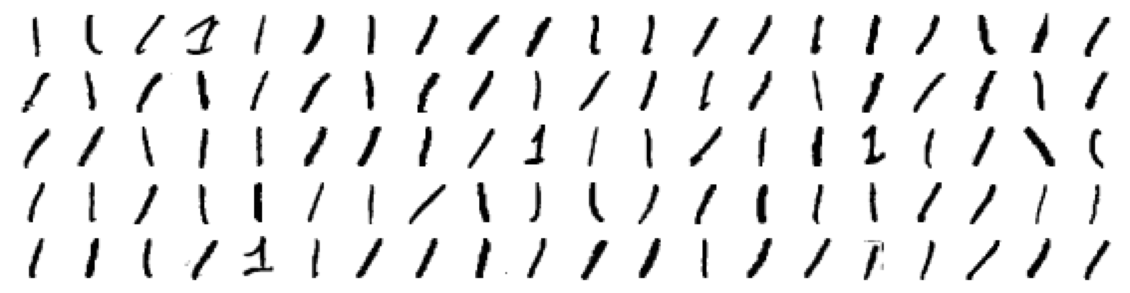

In [13]:
# –≤—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —ç–ª–µ–º–µ–Ω—Ç—ã –∫–ª–∞—Å—Å–æ–≤ "1" –∏ "7"

train_x = np.vstack((trainX[trainY == '1'], trainX[trainY == '7'])) 
train_y = np.hstack([np.ones(len(trainX[trainY == '1'])), np.zeros(len(trainX[trainY == '7'])) - 1])
test_x = np.vstack((testX[testY == '1'], testX[testY == '7'])) 
test_y = np.hstack([np.ones(len(testX[testY == '1'])), np.zeros(len(testX[testY == '7'])) - 1])
plt.figure(figsize=(20,10))
np.random.seed(22)
indexes = np.random.permutation(100)
images = np.array([train_x[index] for index in indexes])
showDigits(images)
plt.show()

 accuracy = 0.987072945521699


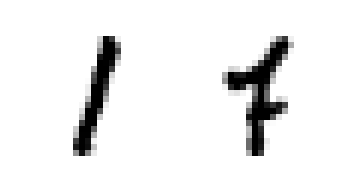

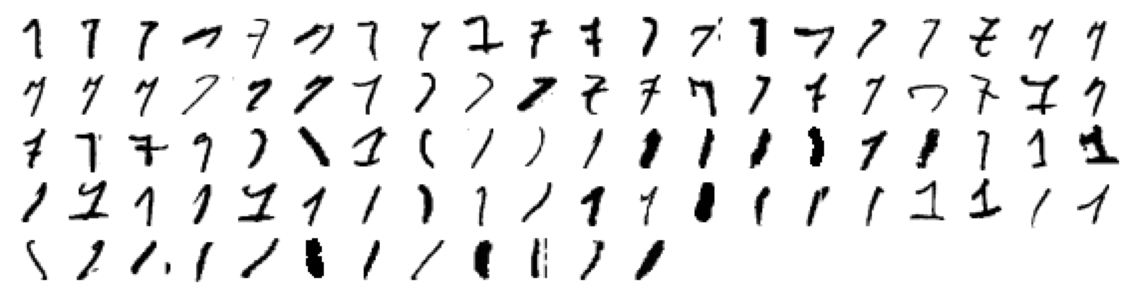

In [14]:
svm_17 = LinearSVC(random_state = 17, max_iter = 10000)
svm_17.fit(train_x, train_y)
svm_17_accuracy = accuracy_score(test_y, svm_17.predict(test_x))
print(f' accuracy = {svm_17_accuracy}')
ind0 = np.argmin(np.abs(svm_17.decision_function(train_x[train_y==-1]) - 1))  # —Å–µ–º–µ—Ä–∫–∞, –∫–æ—Ç–æ—Ä–∞—è –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø–æ—Ö–æ–∂–∞ –Ω–∞ 1
ind1 = np.argmin(np.abs(svm_17.decision_function(train_x[train_y==1]) - 1))  # –µ–¥–∏–Ω–∏—Ü–∞, –∫–æ—Ç–æ—Ä–∞—è –±–æ—å–ª—à–µ –≤—Å–µ–≥–æ –ø–æ—Ö–æ–∂–∞ –Ω–∞ 1
w = svm_17.coef_
indexes = []
for i in range(len(train_x)):
    summ = np.sum(train_x[i] * w)
    if summ >= 1. and summ <= 1.006:
        indexes.append(train_x[i])
    if summ <= -1 and summ >= -1.02:
        indexes.append(train_x[i])
showDigits(np.array(indexes)) # —Å–Ω–∞—á–∞–ª–∞ 1, –ø–æ—Ç–æ–º 7
plt.show()
plt.close()
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(train_x, train_y)
# indexes = clf.support_
plt.figure(figsize=(20,10))
images = np.array([train_x[index] for index in clf.support_])
showDigits(images)
plt.show()
# print(indexes)

–ü–æ–∏—Å–∫ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, –µ—Å–ª–∏ –∏–∑–≤–µ—Å—Ç–Ω–∞ –Ω–æ—Ä–º–∞–ª $w$ –∫ —Ä–∞–∑–¥–µ–ª—è—é—â–µ–π –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç–∏.

—É—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å–∞–º–æ–π —Ä–∞–∑–¥–µ–ª—è—é—â–µ–π –ø–ª–æ—Å–∫–æ—Å—Ç–∏ —Ç–æ–∂–µ –∏–∑–≤–µ—Å—Ç–Ω–æ $w*x - b = 0$

—Ç–æ–≥–¥–∞ –æ–ø–æ—Ä–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä–∞ $x_i$, $x_j$ –¥–æ–ª–∂–Ω—ã —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—Ç—å —É—Å–ª–æ–≤–∏—é:
$w*x_i - b = 1$ –∏ $w*x_j - b = -1$ - –ø—Ä–æ–±–µ–≥–∞–µ–º—Å—è –ø–æ –≤—Å–µ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É –ø–µ—Ä–µ–º–Ω–æ–∂–∞—è –≤—Å–µ —ç–ª–µ–º–µ–Ω—Ç—ã —Å w –∏ –≤—ã–±–∏—Ä–∞–µ–º –¥–≤–∞ —Ç–∞–∫–∏—Ö —ç–ª–µ–º–µ–Ω—Ç–∞, —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è—é—â–∏—Ö –≤—ã—à–µ–∏–∑–ª–æ–∂–µ–Ω–Ω—ã–º —É—Å–ª–æ–≤–∏—è–º.

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(trainX, trainY)
knn_prediction = knn.predict(testX)
knn_accuracy = accuracy_score(testY, knn_prediction)
print(f'accuracy = {knn_accuracy}')

###LogReg with SGD

–ü—É—Å—Ç—å w - –≤–µ–∫—Ç–æ—Ä –≤–µ—Å–æ–≤, –∫–æ—Ç–æ—Ä—ã–π –∑–∞–¥–∞–µ—Ç —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç—å (w*x)=0

SGD - –º–µ—Ç–æ–¥ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –º—ã –¥–µ–ª–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —à–∞–≥ —Ç–æ–ª—å–∫–æ –≤–¥–æ–ª—å –æ–¥–Ω–æ–π –∏–∑ –æ—Å–µ–π.

–ê–ª–≥–æ—Ä–∏—Ç–º:
1. –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–∞—Ç—Ä–∏—Ü—É –≤–µ—Å–æ–≤ —Å–ª—É—á–∞–π–Ω—ã–º —Å–ø–æ—Å–æ–±–æ–º
2. –Ω–∞—á–∞–ª—å–Ω–æ–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –∫–∞—á–µ—Å—Ç–≤–∞ Q = \frac{1}{l}‚àëL(w)
3. —Ü–∏–∫–ª
4. —Å–ª—É—á–∞–π–Ω—ã–π –≤—ã–±–æ—Ä –Ω–∞–±–ª—é–¥–µ–Ω–∏—è —Ö_–∫ –∏–∑ –•^l
5. –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å ‚Ñá_k = L_k(w) 
6. —à–∞–≥ –ø—Å–µ–≤–¥–æ–≥—Ä–∞–¥–∏–µ–Ω—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞: w = w - \nu gradient[L_k(w)]
7. –ø–µ—Ä–µ—Å—á–µ—Ç —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –∫–∞—á–µ—Å—Ç–≤–∞: Q = Œª‚Ñá_k + (1-Œª)Q, –≥–¥–µ –º–æ–∂–Ω–æ –ø–æ–ª–æ–∂–∏—Ç—å Œª=2/(N+1)

$w_{t+1}=w_t - Œ£\frac{d Loss_i}{dw_i}$

$Loss_i = -(Ylog(p) + (1-p)log(1-p))$

$p = sigma(xw)$

$\frac{dsigma}{dw} = sigma(1-sigma) -> dp = p(1-p)$

$\frac{dLoss_i}{dp} = -(\frac{y}{p} - \frac{1-y}{1-p})dp = -(\frac{y(1-p) + (y-1)p}{p(1-p)})p(1-p) = p - y$

$x_{nùöám} * w_{mùöá1} = A_{nùöá1} $

$sigma(A_{nùöá1}) - Y_{nùöá1} = B_{nùöá1}$

$x^{T}_{mùöán} * B_{nùöá1} = dw_{mùöá1}$

In [45]:
class SGD:
    def __sigma(self, t):
        #–æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º —Å—Ç–µ–ø–µ–Ω—å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç—ã
        t =  np.clip(t, -10, 10)
        return 1 / (1 + np.exp(-t))

    def __d_sigma(self, t):
        t = np.clip(t, -10, 10)
        return self.__sigma(t) / (1 - self.__sigma(t))

    def _l1_reg(self):
        return 1/self.C * np.sign(self.w)

    def _l2_reg(self):
        return 1/self.C * self.w

    def _none_reg(self):
        return 0

    def __init__(self, regulizer: str, C=None, alpha=None, max_epochs=None, 
                 chunck_size=None, min_err=None, batch_size=None) -> None:
        self.C = 1
        if C is not None:
            self.C = C
        self.alpha = 1
        if alpha is not None:
            self.alpha = alpha
        self.max_epoch = 1000
        if max_epochs is not None:
            self.max_epoch = max_epochs
        self.batch_size = 5
        if batch_size is not None:
            self.batch_size = batch_size
        self.min_err = 0.1
        reg = regulizer
        if reg == 'l1':
            self.regulizer = self._l1_reg
        elif reg == 'l2':
            self.regulizer = self._l2_reg
        else:
            self.regulizer = self._none_reg

        self.w, self.errors, self.Q = None, None, None

    def _count_Q(self, X):
        if self.Q is None:
            p = np.clip(p, 1e-15, 1 - 1e-15)
        else:
            pass


    def fit(self, X, y=None):
        np.random.seed(0)
        eps = 1e-15
        # —É–∑–Ω–∞–µ–º —Ä–∞–∑–º–µ—Ä—ã –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
        n, m = X.shape

        sigma = self.__sigma
        batch_size = self.batch_size
        errors = np.empty(self.max_epoch)
        errors[:]=np.nan
        # –¥–æ–±–∞–≤–ª—è–µ–º –µ–¥–∏–Ω–∏—á–∫—É
        X_b = np.c_[X, np.ones(n)]
        self.w = np.random.randn(m+1, 1)
        Y = np.vstack(y)

        for epoch in range(self.max_epoch):
            # –¥–ª—è –º–µ—Ç–æ–¥–∞ SGD –±—É–¥–µ–º –≤—ã–±–∏—Ä–∞—Ç—å —ç–ª–µ–º–µ–Ω—Ç—ã –≤—ã–±–æ—Ä–∫–∏ —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º
            # —Å–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ –∏–Ω–¥–µ–∫—Å–æ–≤ –∏ –ø–µ—Ä–µ–º–µ—à–∞–µ–º –µ–≥–æ
            lst = list(range(n))
            np.random.shuffle(lst)
            # –¥–µ–ª–∏–º –≤—Å–µ –Ω–∞ –∫—É—Å–∫–∏
            chunks = [lst[i:i+batch_size] for i in range(0, n, batch_size)]
            for chunk in chunks:
                xi=X_b[chunk]
                yi = Y[chunk]
                gradients = xi.T.dot((sigma(xi.dot(self.w)) - yi))
                self.w = self.w - self.alpha * (gradients + self.regulizer())
                # print(self.w.shape)
            p = sigma(X_b.dot(self.w))
            p = np.clip(p, eps, 1-eps)
            # cross-entropy / LogLoss
            loss = 1 /n * np.sum(-(Y * np.log(p) + (1 - Y)*np.log(1-p)))
            errors[epoch] = loss
            if epoch%10 == 0:
                print(f'epoch = {epoch}\tloss ={loss}')
            if loss <= self.min_err:
                break
        self.errors = errors
        # return self

    def predict_proba(self, X):
        if self.w is None:
            raise Exception("Model is not fitted yet. Use method 'fit'")

        n, m = X.shape
        X_b = np.c_[X, np.ones(n)]
        y1 = self.__sigma(X_b.dot(self.w))
        y0 = 1 - y1
        y_hat_proba = np.c_[y0, y1]
        return y_hat_proba

    def predict(self, X):
        y_hat_proba = self.predict_proba(X)
        y_hat = np.where(y_hat_proba[0] >= 0.5, 0, 1)
        return y_hat

In [ ]:
gradient = d/dx

In [46]:
train_y = np.hstack([np.ones(len(trainX[trainY == '1'])), np.zeros(len(trainX[trainY == '7']))])
test_y = np.hstack([np.ones(len(testX[testY == '1'])), np.zeros(len(testX[testY == '7']))])

sgd_clf = SGD(regulizer='l1')
sgd_clf.fit(X=train_x, y=train_y)

epoch = 0	loss =5.214951663188197
epoch = 10	loss =5.201234242063369
epoch = 20	loss =4.429205020544479
epoch = 30	loss =5.214951663188197
epoch = 40	loss =5.214951663188197
epoch = 50	loss =5.212665426334059
epoch = 60	loss =5.214951663188197
epoch = 70	loss =5.214951663188197
epoch = 80	loss =5.214951663188197
epoch = 90	loss =4.428486256259186
epoch = 100	loss =5.214951663188197
epoch = 110	loss =5.214951663188197
epoch = 120	loss =5.214951663188197
epoch = 130	loss =1.678143249836574
epoch = 140	loss =5.214951663188197
epoch = 150	loss =5.214951663188197
epoch = 160	loss =5.214951663188197
epoch = 170	loss =5.214951663188197
epoch = 180	loss =3.4019658378566935
epoch = 190	loss =5.214951663188197
epoch = 200	loss =3.349397402407077
epoch = 210	loss =4.730269450110923
epoch = 220	loss =5.214951663188197
epoch = 230	loss =5.214951663188197
epoch = 240	loss =3.171055915588747
epoch = 250	loss =5.214951663188197
epoch = 260	loss =5.214951663188197
epoch = 270	loss =2.5766343335128434
e

In [47]:
prediction = [sgd_clf.predict(np.array([x]))[0] for x in test_x]
sgd_accuracy = accuracy_score(test_y, prediction)
print(f'accuracy = {sgd_accuracy}')

accuracy = 0.47460757156048017


###–°–ª—É—á–∞–π–Ω—ã–π –õ–µ—Å

In [ ]:
class RF:
    def __init__(self, k=None, T=None, batch_size=None) -> None:
        self.T, self.k, self.batch_size = 10, 10, 100
        if T is not None:
            self.T = T
        if k is not None:
            self.k = k
        if batch_size is not None:
            self.batch_size = batch_size
        self.trees = []

    def fit(self, trainX, trainY) -> float:
        n, m = trainX.shape
        # —á—Ç–æ–±—ã –æ–±–µ—Å–ø–µ—á–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—É—é –Ω–µ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å, –±—É–¥–µ–º –≤—ã–±–∏—Ä–∞—Ç—å —Ñ–∏—á–∏
        # —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –±–µ–∑ –≤–æ–∑–≤—Ä–∞—â–µ–Ω–∏—è
        features_indexes = list(range(m))
        np.random.shuffle(features_indexes)
        trees_features = np.array([np.array(features_indexes[i:i+self.k]) for i in range(0, m, self.k)])
        self.indexes = trees_features
        counter = 0
        # for t in self.T:
        for t in range(len(trees_features)):
            # –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º –≤—ã–±–æ—Ä–∫—É –∏ –≤—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—É—é –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –¥–ª–∏–Ω—ã n^0.5
            lst = np.array(list(range(n)))
            np.random.shuffle(lst)
            sub_samples = trainX[lst[:int(np.sqrt(n))]]
            tree = DecisionTreeClassifier(criterion='gini', max_depth = 15, random_state=17)  # max_depth=3,
            tree.fit(sub_samples[:, trees_features[counter]], trainY[lst[:int(np.sqrt(n))]])
            self.trees.append(tree)
            counter += 1


    def predict(self, testX) -> np.array:
        predictions = []
        for x in testX:
            prediction = []
            for i in range(len(self.trees)):
                prediction.append(self.trees[i].predict([x[self.indexes[i]]]))
            predictions.append(np.round(np.sum(np.array(prediction)) / len(self.trees)))
        return np.array(predictions)

In [ ]:
forest = RF(k=28)
forest.fit(train_x, train_y)
prediction = forest.predict(test_x)
print(f'accuracy = {accuracy_score(test_y, prediction)}')

accuracy = 0.9602954755309326


In [ ]:
print(f'trees amount: {len(forest.trees)}')

trees amount: 28
